coord1 and coord2 in COLVAR and HILLS are equal. \
coord1 and coord2 are dumped every timestep in COLVAR. \
But in HILLS, they are dumped every time when spawning a hill (also called Gaussian kernel or bias).

It has been tested that \
both  ~/Tools/<font color=red>sum_hills.py</font>  and  PLUMED <font color=red>sum_hills</font> work. \
**fes.dat** will be written. 

https://www.plumed.org/doc-v2.7/user-doc/html/_m_e_t_a_d.html

Herein use PLUMED SUM_HILLS by running: \
<font color=blue> plumed sum_hills --hills HILLS.0,HILLS.1 --bin 200,200 --min -0.2,-0.2 --max 0.9,0.9 </font>

In terminal use sum_hills.py: \
<font color=blue> sum_hills.py --hills HILLS.0,HILLS.1 --bin 200,200 --min -0.2,-0.2 --max 0.9,0.9 </font>

$ \large
V(\vec{s},t) = \sum_{ k \tau < t} W(k \tau) \exp\left( -\sum_{i=1}^{d} \frac{(s_i-s_i^{(0)}(k \tau))^2}{2\sigma_i^2} \right)
$

$ \large
F(\vec{s}) = -V(\vec{s})
$

$ V(\vec{s}) $ = sum of Gaussian hills \
$ F(\vec{s}) $ = free energy \
$ \vec{s} $ = CV in Gaussian function \
$ t $ = time \
$ k \tau $ = time frequency of spawning Gaussian hills \
$ W $ = height of Gaussian hills \
$ d $ = dimensions (d=2, CV1 and CV2) \
$ \sigma $ = width of Gaussian hills

Gaussian function: $ \large f(x)=a e^{-\frac{(x-b)^{2}}{2c^{2}}} $

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from mpl_toolkits import mplot3d
# import subprocess

In [3]:
# Path
# set working directory for all future cells
# os.chdir("/media/luping/work/CH4/prelim/Speybroeck/run-1/Hills/")
# os.chdir("/media/luping/work/CH4/prelim/Speybroeck/run-2/walker-0/moveon")
# os.chdir("/media/luping/work/CH4/prelim/metad/M4-TSB-M5-8/Hills")
os.chdir("/media/luping/work/CH4/prelim/metad/M4-TSB-M5-9/Hills")

# cvfile = "COLVAR"
# colvar = np.loadtxt(cvfile)

os.getcwd()

'/media/luping/work/CH4/prelim/metad/M4-TSB-M5-9/Hills'

In [10]:
!plumed sum_hills --hills HILLS.0,HILLS.1 --bin 200,200

PLUMED: PLUMED is starting
PLUMED: Version: 2.7.3 (git: Unknown) compiled on Jan 13 2022 at 15:25:07
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!
PLUMED: Finished setup
PLUMED: Action FAKE
PLUMED:   with label coord1
PLUMED

In [11]:
fes = np.loadtxt("fes.dat", comments="#!")
grid = int(fes.shape[0]**0.5)
cv1 = fes[:, 0].reshape(grid, grid)
cv2 = fes[:, 1].reshape(grid, grid)
free = fes[:, 2].reshape(grid, grid)


def mycontour(cv1, cv2, free):
    # use plt.contour to add contour lines
    # 8 means contour density
    C = plt.contour(cv1, cv2, free, 8, linewidths=0.5, colors='k')
    
    # X, Y and value for (X,Y) point
    # parameters: X, Y, f(X,Y)
    # transparent=0.75, use hot colormap
    # use plt.contourf to fill contours
    cntr = plt.contourf(cv1, cv2, free, 8, alpha=0.75, cmap=cm.jet)
    
    # inline=True remove contour under the number of free energy
    # the number will cover the contour
    plt.clabel(C, inline=True, fontsize=10)
    plt.colorbar(cntr, label="FES [kJ/mol]")
    # plt.show()


def my3D(cv1, cv2, free):
    # fig = plt.figure()
    ax = plt.axes(projection='3d')
    s = ax.plot_surface(cv1, cv2, free, cmap='viridis', edgecolor='none')
    plt.colorbar(s, label="FES [kJ/mol]")
    # ax.set_title('Surface plot')
    # plt.show()

In [9]:
colvar.shape

(25737, 4)

In [5]:
%matplotlib widget
plt.plot(colvar[:,0], colvar[:,1], label='cv1, C-O')
plt.plot(colvar[:,0], colvar[:,2], label='cv2, C-Cu')
plt.xlabel("time[fs]")
plt.ylabel("cv")
plt.legend()
# plt.show()

NameError: name 'colvar' is not defined

In [12]:
free.shape

(201, 201)

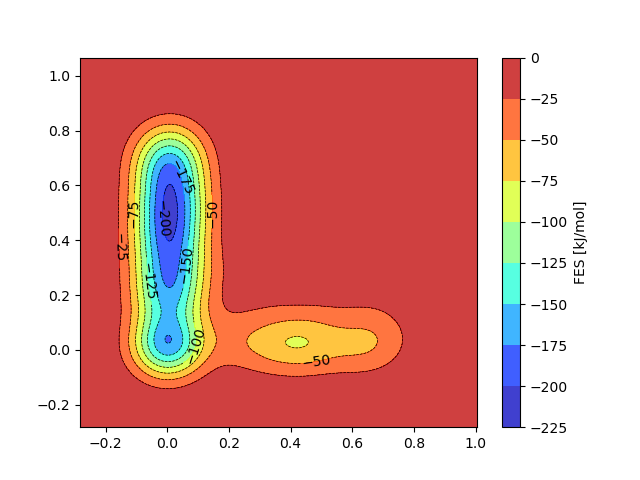

In [13]:
%matplotlib widget
mycontour(cv1, cv2, free)

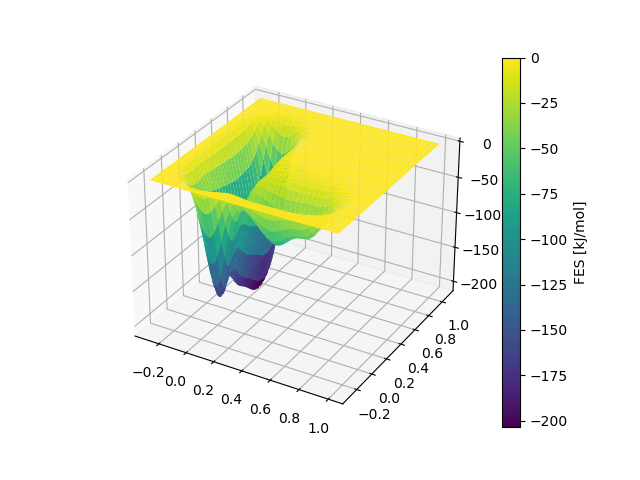

In [14]:
%matplotlib widget
my3D(cv1, cv2, free)

## Backup some codes

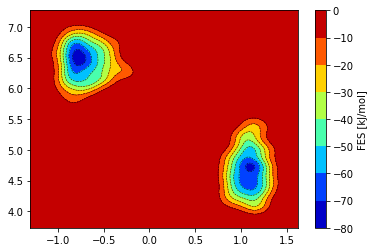

In [36]:
f0 = np.loadtxt("gausshills.dat.0")
f1 = np.loadtxt("gausshills.dat.1")

free = -f0-f1
grid = 200    # how fine is plot, max 5000
xlim = [-1.3, 1.62]
ylim = [3.73, 7.27]
x = np.linspace(xlim[0], xlim[1], grid)
y = np.linspace(ylim[0], ylim[1], grid)
X, Y = np.meshgrid(x, y)

plt.contour(X, Y, free, linewidths=0.5, colors='k')
cntr = plt.contourf(X, Y, free, cmap=cm.jet)
plt.colorbar(cntr, label="FES [kJ/mol]")

In [5]:
fes = np.loadtxt("fes.dat")
cv1 = fes[:, 0].reshape(201, 201)
cv2 = fes[:, 1].reshape(201, 201)
free = fes[:, 2].reshape(201, 201)

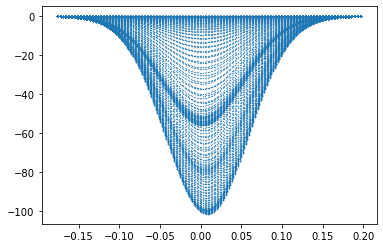

In [6]:
plt.scatter(fes[:,0], fes[:,2], s=0.1)

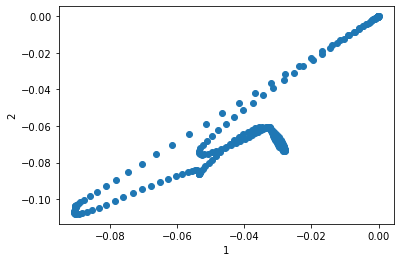

In [7]:
plt.scatter(free[:,0], free[:,1])
# plt.xlim((-10, 10))
plt.xlabel("1")
plt.ylabel("2")
plt.show()

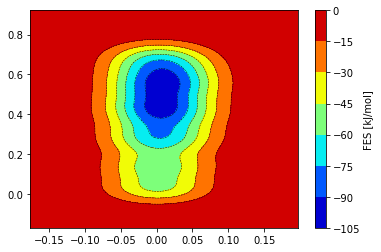

In [30]:
plt.contour(cv1, cv2, free, linewidths=0.5, colors='k')
cntr = plt.contourf(cv1, cv2, free, cmap=cm.jet)
plt.colorbar(cntr, label="FES [kJ/mol]")

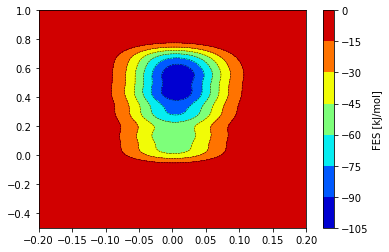

In [28]:
test = np.loadtxt("gausshills.dat")
test.shape
grid = 200    # how fine is plot, max 5000
xlim = [-0.2, 0.2]
ylim = [-0.5, 1]
x = np.linspace(xlim[0], xlim[1], grid)
y = np.linspace(ylim[0], ylim[1], grid)
X, Y = np.meshgrid(x, y)

test = np.loadtxt("graph.txt.3")
plt.contour(X, Y, -test, linewidths=0.5, colors='k')
cntr = plt.contourf(X, Y, -test, cmap=cm.jet)
plt.colorbar(cntr, label="FES [kJ/mol]")

graph.txt.3   is used.


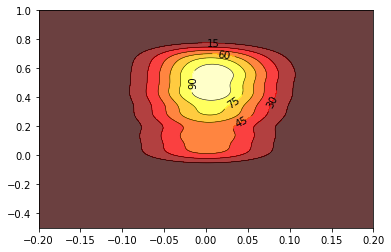

In [22]:
%run ~/Tools/sum_hills.py --hills HILLS.0,HILLS.1 --bin 500,500 

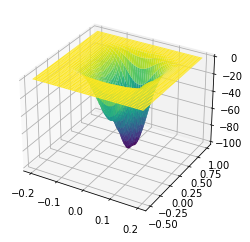

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, -test, cmap='viridis', edgecolor='none')
# ax.set_title('Surface plot')
plt.show()